# The problem 
An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?

3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by $((x – 2.5cm) / 30cm )^{2} + ( (y – 2.5cm) / 40cm )^{2} < 1$ in coordinate system where the anthill is located at (x = 0cm, y = 0cm)?



In [76]:
from numpy.random import default_rng
import matplotlib.pyplot as plt


class Ant:
    def __init__(self) -> None:
        self.x: int = 0
        self.y: int = 0
        self.rng = default_rng()

    def move(self) -> None:
        move = self.rng.choice(["N", "E", "S", "W"])
        if move == "N":
            self.y += 10
        if move == "S":
            self.y -= 10
        if move == "E":
            self.x += 10
        if move == "W":
            self.x -= 10

    def time_to_food(self) -> int:
        seconds = 0
        while (abs(self.x) < 20) and (abs(self.y) < 20):
            seconds += 1
            self.move()
        self.reset_coords()
        return seconds

    def reset_coords(self) -> None:
        self.x = 0
        self.y = 0

    def plot_walk(self) -> None:
        points = [(0, 0)]
        seconds = 0
        while (abs(self.x) < 20) and (abs(self.y) < 20):
            seconds += 1
            self.move()
            points.append((self.x, self.y))
        plt.plot([p[0] for p in points], [p[1] for p in points])
        plt.suptitle(f"{seconds=}")
        self.reset_coords()

(array([6.243e+03, 2.469e+03, 7.940e+02, 3.560e+02, 9.300e+01, 2.700e+01,
        1.100e+01, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([ 2. ,  4.9,  7.8, 10.7, 13.6, 16.5, 19.4, 22.3, 25.2, 28.1, 31. ]),
 <BarContainer object of 10 artists>)

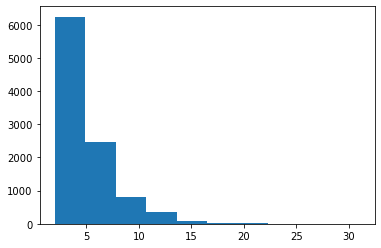

In [84]:
import numpy as np

ant = Ant()
num_repeats = int(1e4)

times = np.array([ant.time_to_food() for _ in range(num_repeats)])
plt.hist(times)

In [81]:
mean = np.mean(times)
variance = np.sum((times - mean) ** 2) / num_repeats
stdev = np.sqrt(variance)

print(f"{mean=:.3f}\n{variance=:.3f}\n{stdev=:.3f}")

mean=4.504
variance=8.438
stdev=2.905
